# **PyTorch Classification Exercise - Solution**

In [1]:
# Check for GPU
!nvidia-smi

Wed Oct 23 07:28:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [25]:
!pip install torchmetrics mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 24.8 MB/s eta 0:00:00


In [26]:
# Import torch
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import nn
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from torchmetrics import Accuracy

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.4.1+cu121


'cuda'

## **Q1 Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?**

In [3]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [6]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## **Q2 Write transforms necessary for data augmentation for the `MNIST` dataset**

In [7]:
train_transform = transforms.Compose([
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.ToTensor()
])

## **Q3 Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets**

In [8]:
# Get the MNIST train dataset
train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=train_transform) # do we want to transform the data as we download it?

# Get the MNIST test dataset
test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=test_transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 16239554.32it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 496134.46it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4542197.85it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4646470.43it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [9]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [10]:
len(train_data), len(test_data)

(60000, 10000)

In [12]:
# Data is in tuple form (image, label)
img = train_data[0][0]
label = train_data[0][1]
# Check out the shapes of our data
print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer


In [13]:
# Get the class names from the dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## **Q4 Visualize at least 5 different samples of the MNIST training dataset**

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


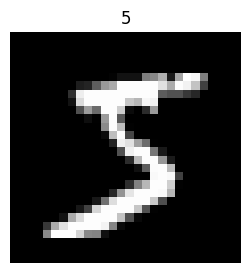

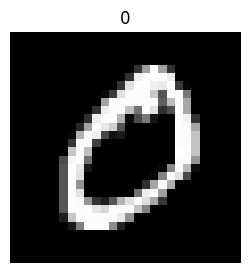

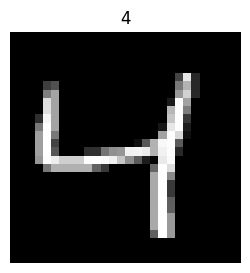

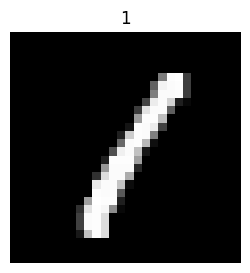

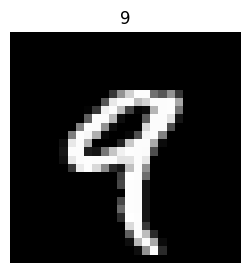

In [14]:
for i in range(5):
  img = train_data[i][0]
  print(img.shape)
  img_squeeze = img.squeeze()
  print(img_squeeze.shape)
  label = train_data[i][1]
  plt.figure(figsize=(3, 3))
  plt.imshow(img_squeeze, cmap="gray")
  plt.title(label)
  plt.axis(False);

## **Q5 Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`**

In [15]:
# Create train dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

In [16]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b6d54c439d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b6d54c40670>)

In [17]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [18]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## **Q6 Create a CNN model capable of fitting on the MNIST dataset. You can select any known architecture or create a variant of your own**

In [19]:
class MNIST_model(torch.nn.Module):
  """Model capable of predicting on MNIST dataset.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [20]:
model = MNIST_model(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)
model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [21]:
# Try a dummy forward pass to see what shapes our data is
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
# dummy_x.shape
model(dummy_x)

tensor([[ 0.0129, -0.0944,  0.0059,  0.0492,  0.0127,  0.0047,  0.0111, -0.0004,
         -0.0562,  0.0214]], device='cuda:0', grad_fn=<AddmmBackward0>)

## **Q7 Train the model you built in Q5 for 5 epochs**

In [27]:
# Train on GPU
model = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
accuracy_fn = Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  train_accu = 0
  model.train()
  for batch, (X, y) in enumerate(train_dataloader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_accu += accuracy_fn(y_pred.argmax(dim=1), y)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss to number of batches
  train_loss /= len(train_dataloader)
  train_accu /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0
  test_accu_total = 0
  # Put model in eval mode and turn on inference mode
  model.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model(X_test)
      test_loss = loss_fn(test_pred, y_test)
      test_accu = accuracy_fn(test_pred.argmax(dim=1), y_test)

      test_loss_total += test_loss
      test_accu_total += test_accu

    # Adjust test loss total for number of batches
    test_loss_total /= len(test_dataloader)
    test_accu_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f} | Accuracy: {train_accu:.3f} | Test Accuracy: {test_accu_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.321 | Test loss: 0.078 | Accuracy: 0.894 | Test Accuracy: 0.973
Epoch: 1 | Loss: 0.084 | Test loss: 0.058 | Accuracy: 0.975 | Test Accuracy: 0.981
Epoch: 2 | Loss: 0.065 | Test loss: 0.067 | Accuracy: 0.980 | Test Accuracy: 0.979
Epoch: 3 | Loss: 0.056 | Test loss: 0.043 | Accuracy: 0.983 | Test Accuracy: 0.986
Epoch: 4 | Loss: 0.050 | Test loss: 0.058 | Accuracy: 0.984 | Test Accuracy: 0.980


## **Q8 Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label**

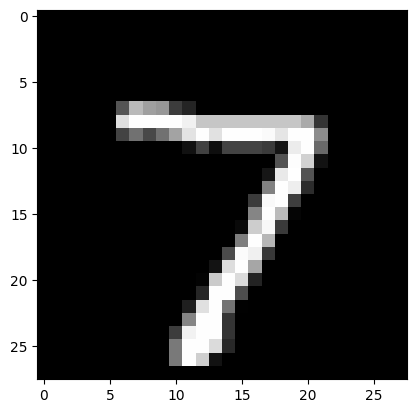

In [28]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [29]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model(test_data[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

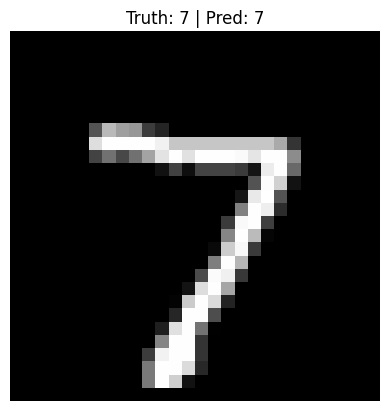

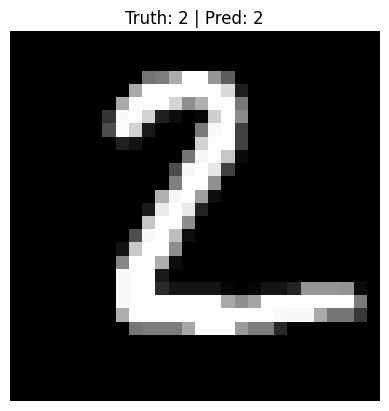

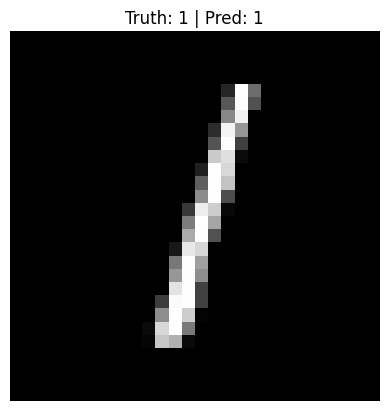

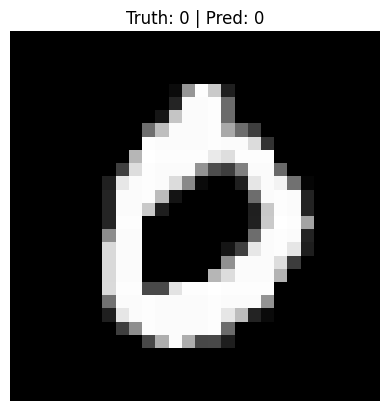

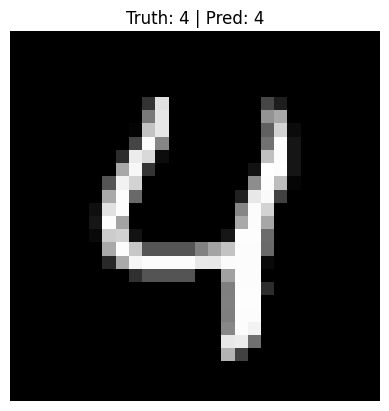

In [31]:
num_to_plot = 5
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

## **Q9 Plot a confusion matrix comparing your model's predictions to the truth labels**



In [32]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [33]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


In [34]:
# Make predictions across all test data
from tqdm.auto import tqdm
model.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [35]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

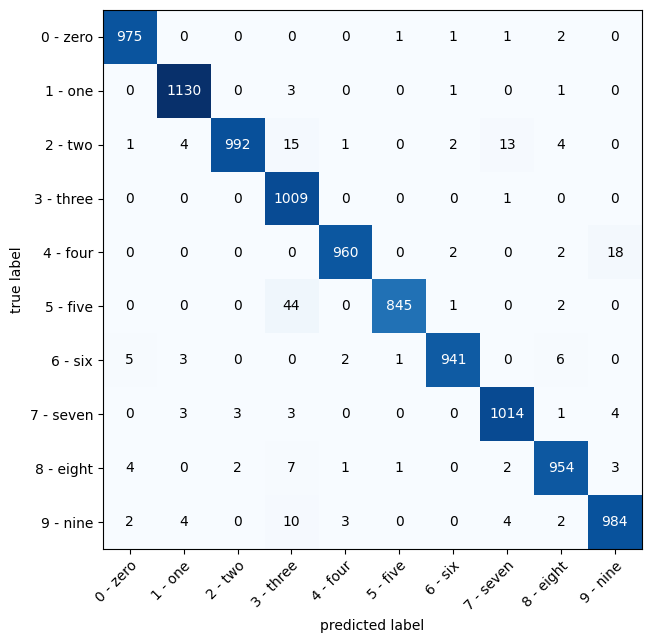

In [36]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)


## **Q10 Result Analysis**
* Plot some predictions from the test_data above where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a **modelling error** or a **data error**?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "7" label is too close to "2")?

In [38]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(y_preds != test_data.targets)[0]
len(wrong_pred_indexes)

196

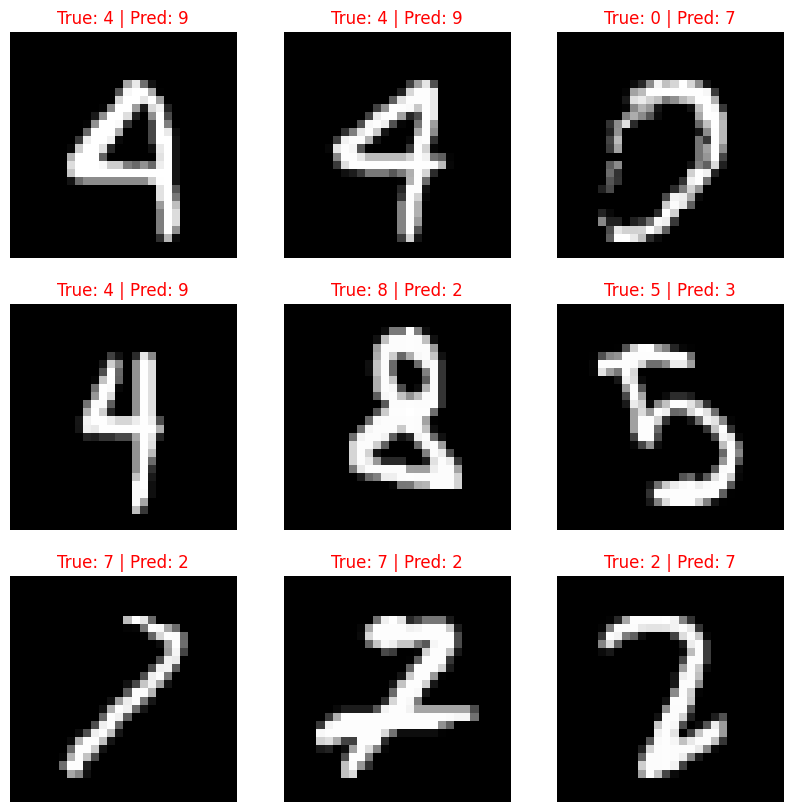

In [40]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = test_data[idx][1]
  pred_label = y_preds[idx]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(test_data[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);